In [45]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [29]:
import os
import shutil
import cv2

In [30]:
masks = os.listdir('train/mask')

In [31]:
imgs = os.listdir('train/imgs')
len(imgs)

1107

In [32]:
os.makedirs("aug2/train/imgs/sample.csv",exist_ok=True)
os.makedirs("aug2/train/masks/sample.csv",exist_ok=True)

## Function to superimpose valid imagery over blank areas of an image

In [33]:
def superimpose(src_image,bg_image,mask,inv_mask):
    paste_img_bg = cv2.bitwise_and(bg_image,bg_image,mask = mask)
    orig_fore = cv2.bitwise_and(src_image,src_image,mask=inv_mask)
    img_fore = cv2.add(paste_img_bg,orig_fore)
    return img_fore

def dopasteover(job):
    fore_name = job['fg']
    bg_name = job['bg']
    img_fore = cv2.imread("train/imgs/"+fore_name)
    mask_fore = cv2.imread("train/mask/"+fore_name)
    img_bg = cv2.imread("train/imgs/"+bg_name)
    mask_bg = cv2.imread("train/mask/"+bg_name)
    height, width = img_fore.shape[:2]
    img_bg = cv2.resize(img_bg, (width, height), interpolation = cv2.INTER_CUBIC)
    mask_bg = cv2.resize(mask_bg, (width, height), interpolation = cv2.INTER_CUBIC)
    mask_fore = cv2.resize(mask_fore, (width, height), interpolation = cv2.INTER_CUBIC)
    mask = cv2.inRange(img_fore,(255,255,255),(255,255,255))
    inv_mask = cv2.inRange(img_fore,(0,0,0),(254,254,254))
    img_fore = superimpose(img_fore,img_bg,mask,inv_mask)
    mask_fore = superimpose(mask_fore,mask_bg,mask,inv_mask)
    cv2.imwrite('aug2/train/imgs/'+fore_name,img_fore)
    cv2.imwrite('aug2/train/masks/'+fore_name,mask_fore)

## Find % age of white pixels in train images

In [34]:
def find_white_pixel_prcnt(img_name):
    img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
    n_white_pix = np.sum(img == 255)
    total_n = img.shape[0]*img.shape[1]
    return n_white_pix/total_n

In [35]:
cutouts = []
suitablebg = []
for each in imgs:
    white_prcnt = find_white_pixel_prcnt("train/imgs/"+each)
    if white_prcnt>0.05:
        cutouts.append(each)
    elif white_prcnt<0.01:
        suitablebg.append(each)

In [36]:
len(cutouts),len(suitablebg)

(354, 717)

## 354 images have white areas, whereas 717 images are suitable replacements for them

In [38]:
jobs = []
for each in cutouts:
    jobs.append({'fg':each,'bg':np.random.choice(suitablebg)})

## Images formed by superimposition and pasted to new location.

In [40]:
i=0
for each in jobs:
    i+=1
    dopasteover(each)
    print('Done {} remaining {}'.format(i,len(jobs)-i))

Done 1 remaining 353
Done 2 remaining 352
Done 3 remaining 351
Done 4 remaining 350
Done 5 remaining 349
Done 6 remaining 348
Done 7 remaining 347
Done 8 remaining 346
Done 9 remaining 345
Done 10 remaining 344
Done 11 remaining 343
Done 12 remaining 342
Done 13 remaining 341
Done 14 remaining 340
Done 15 remaining 339
Done 16 remaining 338
Done 17 remaining 337
Done 18 remaining 336
Done 19 remaining 335
Done 20 remaining 334
Done 21 remaining 333
Done 22 remaining 332
Done 23 remaining 331
Done 24 remaining 330
Done 25 remaining 329
Done 26 remaining 328
Done 27 remaining 327
Done 28 remaining 326
Done 29 remaining 325
Done 30 remaining 324
Done 31 remaining 323
Done 32 remaining 322
Done 33 remaining 321
Done 34 remaining 320
Done 35 remaining 319
Done 36 remaining 318
Done 37 remaining 317
Done 38 remaining 316
Done 39 remaining 315
Done 40 remaining 314
Done 41 remaining 313
Done 42 remaining 312
Done 43 remaining 311
Done 44 remaining 310
Done 45 remaining 309
Done 46 remaining 3

## View samples of superimposition

In [58]:
def view_samples(no_of_samples):
    fig,axes = plt.pyplot.subplots(no_of_samples,3,figsize=(20,20),squeeze=False)
    for i in range(0,no_of_samples):
        image_index = np.random.choice(range(len(jobs)))
        org_image = cv2.imread('train/imgs/'+jobs[i]['fg'])
        bg_image = cv2.imread('train/imgs/'+jobs[i]['bg'])
        op_image = cv2.imread('aug2/train/imgs/'+jobs[i]['fg'])
        axes[i,0].imshow(org_image)
        axes[i,1].imshow(bg_image)
        axes[i,2].imshow(op_image)
        #plt.tight_layout()
    plt.pyplot.show()
        

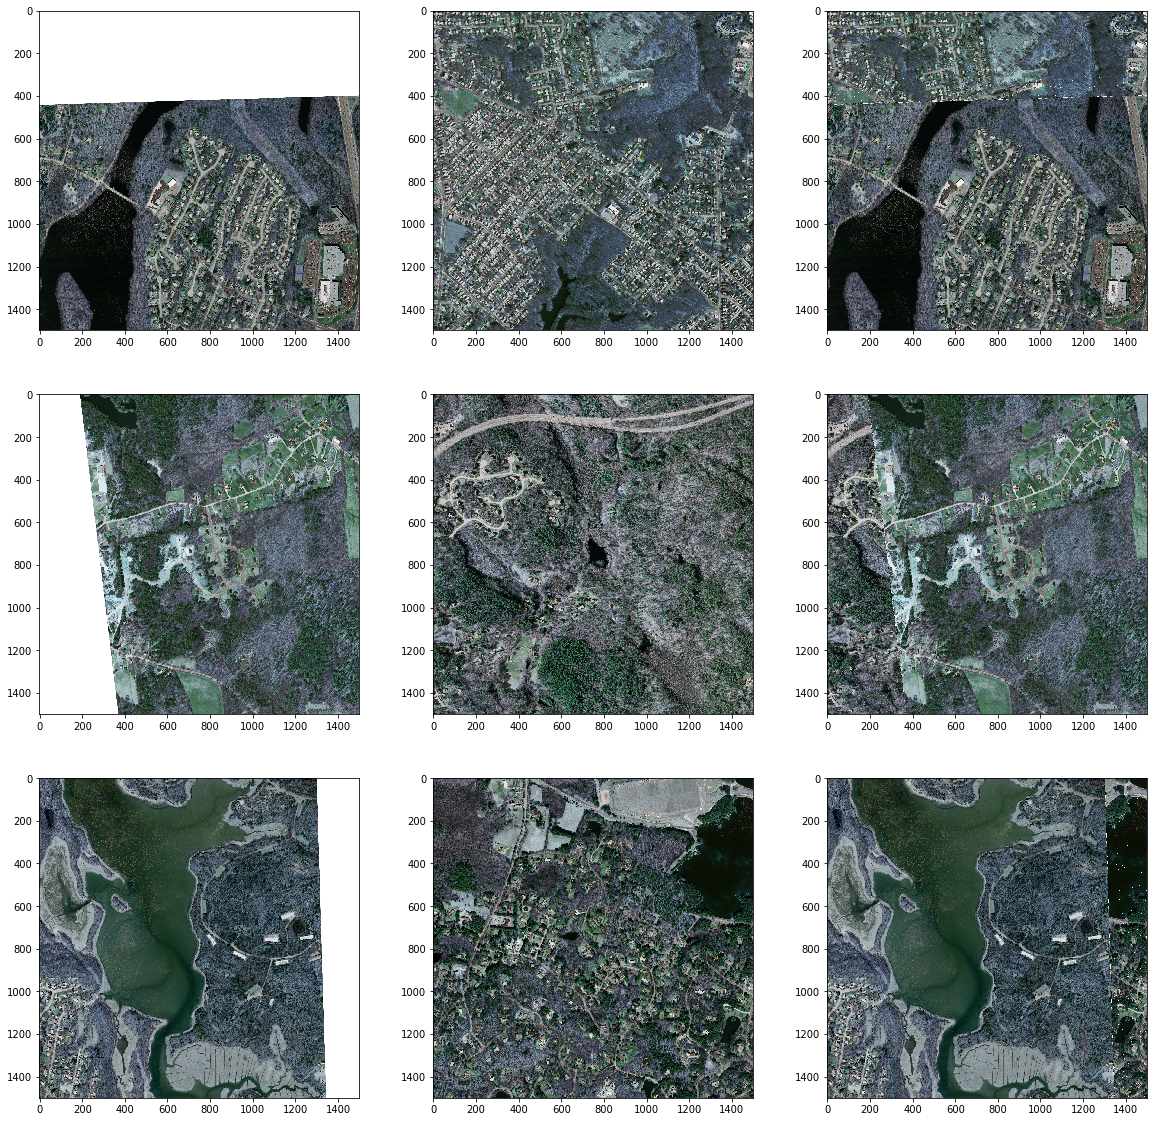

In [59]:
view_samples(3)